In [ ]:
import tensorflow as tf
import PIL.Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
BASE_DIR = '\
/content/drive/MyDrive/Colab/'

In [ ]:
imagen1 = tf.keras.preprocessing.image.load_img(
    BASE_DIR+'trigobn.jpg',color_mode='grayscale')
print(imagen1)

<PIL.JpegImagePlugin.JpegImageFile image mode=L size=224x224 at 0x7A191DF061E0>


In [ ]:
matriz_imagen1 = tf.keras.preprocessing.image.img_to_array(imagen1)
print(matriz_imagen1)

[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[  0.]
  [  0.]
  [  0.]
  ...
  [255.]
  [255.]
  [255.]]

 [[  0.]
  [  0.]
  [  0.]
  ...
  [255.]
  [255.]
  [255.]]

 [[  0.]
  [  0.]
  [  0.]
  ...
  [255.]
  [255.]
  [255.]]]


Color Negro = 0
Color Blanco = 255

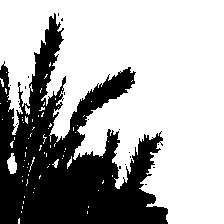

In [ ]:
PIL.Image.open(BASE_DIR+'trigobn.jpg')

Para trabajar con la imagen en TensorFlow, se necesita cargarla dentro de un tensor.

In [ ]:
tensor_imagen1 = tf.constant(matriz_imagen1)
print(tensor_imagen1.get_shape())
print(tensor_imagen1.dtype)

(224, 224, 1)
<dtype: 'float32'>


(x,y,z)
x - número de filas
y - número de columnas
z - valores asociados al pixel

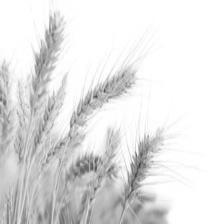

In [ ]:
PIL.Image.open(BASE_DIR+'trigogs.jpg')

In [ ]:
imagen2 = tf.keras.preprocessing.image.load_img(
    BASE_DIR+'trigogs.jpg',color_mode='grayscale')
matriz_imagen2 = tf.keras.preprocessing.image.img_to_array(imagen2)
tensor_imagen2 = tf.constant(matriz_imagen2)
print(tensor_imagen2)

tf.Tensor(
[[[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 [[255.]
  [255.]
  [255.]
  ...
  [255.]
  [255.]
  [255.]]

 ...

 [[175.]
  [193.]
  [209.]
  ...
  [255.]
  [255.]
  [255.]]

 [[177.]
  [194.]
  [207.]
  ...
  [255.]
  [255.]
  [255.]]

 [[181.]
  [195.]
  [203.]
  ...
  [255.]
  [255.]
  [255.]]], shape=(224, 224, 1), dtype=float32)


In [ ]:
imagen3 = tf.keras.preprocessing.image.load_img(
    BASE_DIR+'trigorgb.jpg')
matriz_imagen3 = tf.keras.preprocessing.image.img_to_array(imagen3)
tensor_imagen3 = tf.constant(matriz_imagen3)
print(tensor_imagen3)

tf.Tensor(
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[223. 166.  95.]
  [241. 184. 113.]
  [255. 200. 127.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[225. 168.  97.]
  [242. 185. 114.]
  [255. 198. 125.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[229. 172. 101.]
  [243. 186. 115.]
  [252. 194. 121.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]], shape=(224, 224, 3), dtype=float32)


# Convolución, padding y stringe en imágenes para la construcción de imágnenes inteligentes en tensorflow

In [ ]:
vista = tf.constant([[155,139,157,182,203,217],[136,97,125,176,213,222],
                    [118,62,89,141,203,225],[108,53,60,89,155,202],
                    [171,133,106,78,99,149],[223,207,180,122,100,150]])
print(vista)

tf.Tensor(
[[155 139 157 182 203 217]
 [136  97 125 176 213 222]
 [118  62  89 141 203 225]
 [108  53  60  89 155 202]
 [171 133 106  78  99 149]
 [223 207 180 122 100 150]], shape=(6, 6), dtype=int32)


In [ ]:
# normalizando
vista_norm = vista/255
print(vista_norm)

tf.Tensor(
[[0.60784314 0.54509804 0.61568627 0.71372549 0.79607843 0.85098039]
 [0.53333333 0.38039216 0.49019608 0.69019608 0.83529412 0.87058824]
 [0.4627451  0.24313725 0.34901961 0.55294118 0.79607843 0.88235294]
 [0.42352941 0.20784314 0.23529412 0.34901961 0.60784314 0.79215686]
 [0.67058824 0.52156863 0.41568627 0.30588235 0.38823529 0.58431373]
 [0.8745098  0.81176471 0.70588235 0.47843137 0.39215686 0.58823529]], shape=(6, 6), dtype=float64)


In [ ]:
# kernel
initializer = tf.keras.initializers.GlorotUniform()
valores = initializer(shape=(3,3))
print(valores)

tf.Tensor(
[[-0.1103158   0.635628    0.36464548]
 [ 0.17827201  0.43517447 -0.01313519]
 [ 0.5225365  -0.7055619   0.5701816 ]], shape=(3, 3), dtype=float32)


In [ ]:
kernel = tf.constant([[-0.1103158,0.635628,0.36464548],
                      [0.17827201,0.43517447,-0.01313519],
                      [0.5225365,-0.7055619,0.5701816 ]],dtype=tf.float64)
print(kernel)

tf.Tensor(
[[-0.1103158   0.635628    0.36464548]
 [ 0.17827201  0.43517447 -0.01313519]
 [ 0.5225365  -0.7055619   0.5701816 ]], shape=(3, 3), dtype=float64)


El nombre del parámetro asociado al tamaño del lote de imágenes por procesar debe ser **batch**, después, se debe crear un nuevo bloque de código.

In [ ]:
imagen = tf.reshape(vista_norm,[1,6,6,1],name='imagen')
k = tf.reshape(kernel,[3,3,1,1],name='kernel')

[tamaño del batch, alto de la imagen, ancho de la imagen, # canales de entrada]

[1,6,6,1]

Si fueran más imágenes, el valor de este parámetro incrementaría (batch).
El alto de la imagen es de 6 px,al igual que el ancho. Finalmente, el número de canales de entrada se relaciona al formato de la imagen, es decir, el número de valores numéricos necesarios para expresar el color de cada píxel.

[3,3,1,1]
[alto del kernel, ancho del kernel, # canales de entrada, # canales de salida]

El cambio de forma de los tensores asociados a la matriz inicial y el kernel  es necesario para realizar la convolución con TF.


In [ ]:
conv = tf.reshape(tf.nn.conv2d(
    input=imagen,
    filters=k,
    strides=[1,1,1,1],
    padding='VALID'),[4,4]) # se quita el batch y canales, quedando 4x4
print(conv)

tf.Tensor(
[[1.02736601 1.05960956 1.29895312 1.44303742]
 [0.75424154 0.85085759 1.20488327 1.41084773]
 [0.61305055 0.68516916 1.0118525  1.30216631]
 [0.79894239 0.72268465 0.87454208 1.16122929]], shape=(4, 4), dtype=float64)


Para realizar la convolución se usa
```
tf.nn.convd2d
```
- El primer parámetro es el tensor asociad con la **matriz inicial normalizada**.
- El segundo elemento es el tensor que contiene el kernel **k**.
- El tercer elemento define el **stride** que es un arreglo con 4 valores, esto es debido que tenemos que especificar cual será el desplazamiento por lote de las imágenes.
- Finalmente está el despplazamiento entre canales.

# DeepLearning y otras operaciones

In [ ]:
# Pooling
segmento_manzana = tf.constant([[142,146,142,150,155,164,174,176],
                     [136,141,138,140,145,155,167,173],
                     [123,129,133,138,140,146,156,165],
                     [113,119,131,139,138,139,144,155],
                     [117,117,124,138,145,149,138,139],
                     [120,120,124,145,146,148,140,136],
                     [129,122,117,138,141,144,141,140],
                     [133,124,119,129,135,138,137,144]])
print(segmento_manzana)

tf.Tensor(
[[142 146 142 150 155 164 174 176]
 [136 141 138 140 145 155 167 173]
 [123 129 133 138 140 146 156 165]
 [113 119 131 139 138 139 144 155]
 [117 117 124 138 145 149 138 139]
 [120 120 124 145 146 148 140 136]
 [129 122 117 138 141 144 141 140]
 [133 124 119 129 135 138 137 144]], shape=(8, 8), dtype=int32)


In [ ]:
lote = tf.reshape(segmento_manzana,[1,8,8,1],name='imageninicial')
print(lote)

tf.Tensor(
[[[[142]
   [146]
   [142]
   [150]
   [155]
   [164]
   [174]
   [176]]

  [[136]
   [141]
   [138]
   [140]
   [145]
   [155]
   [167]
   [173]]

  [[123]
   [129]
   [133]
   [138]
   [140]
   [146]
   [156]
   [165]]

  [[113]
   [119]
   [131]
   [139]
   [138]
   [139]
   [144]
   [155]]

  [[117]
   [117]
   [124]
   [138]
   [145]
   [149]
   [138]
   [139]]

  [[120]
   [120]
   [124]
   [145]
   [146]
   [148]
   [140]
   [136]]

  [[129]
   [122]
   [117]
   [138]
   [141]
   [144]
   [141]
   [140]]

  [[133]
   [124]
   [119]
   [129]
   [135]
   [138]
   [137]
   [144]]]], shape=(1, 8, 8, 1), dtype=int32)


In [ ]:
#max-pooling
maxpooling = tf.reshape(tf.nn.max_pool(lote,[1,2,2,1],
                                       [1,2,2,1],
                                       padding='VALID'),[4,4])
print(maxpooling)

tf.Tensor(
[[146 150 164 176]
 [129 139 146 165]
 [120 145 149 140]
 [133 138 144 144]], shape=(4, 4), dtype=int32)


La operación

```
tf.nn.max_pool
```
Recibe:
- Como primer parámetro el lote de imágenes al que se le aplicará el **max-pooling.**
- El segundo, es una lista donde se especificará el tamaño de la región a operar en cada elemento del lote, y al final, el número de canales según el formato de la imagen.
- El tercero es el **stride**.


